In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

# Read the full data set and count occurences
data = pd.read_excel('full_data_output.xlsx')
data.count()


C:\Users\ohund\AppData\Local\Temp\ipykernel_20464\4252007943.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


FileNotFoundError: [Errno 2] No such file or directory: 'full_data_output.xlsx'

In [ ]:
import graphviz
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.sandbox.stats.multicomp import multipletests
import statsmodels.api as sm       

from itertools import combinations 

In [ ]:
# Some output from previous version

   Unnamed: 0  Unnamed: 0.1                 Pseudoniem_client  \
0           0             0  lz2h                               
1           5             5  lz2h                               
2          51            51  lz2h                               
3          19            19  lz2h                               
4       17469         17469  lz2h                               

        Pseudoniem_personeelsnummer           Pseudoniem_Kostenplaats  \
0  lz2x0004i6r30ca2aru2o8qebuknjkp6  lz2r00597lmsjfpjbe6kkorvqt8v95qq   
1  lz2x0013o84u3mbd22bnn87nm53ht677  lz2r000955ljtsjklfv7bg48em6l43fa   
2  lz2x006cir8b1jcjjvng5h415gmjkahj  lz2r000d275m6gtooivu7h3vqaflsi15   
3  lz2x002ftl93i00rh1nm6mqlabi2manm  lz2r0019g4a59bs1rsdei15tfj1igsf4   
4  lz2x005c00dn2bs3bv43dcfe30578pvv  lz2r000t90qi2vagu7h461ec7lcf6iso   

   Meldingsnummer  Cluster Algemeen: Datum incident  year  month  ...  \
0           34333       21               2015-01-05  2015      5  ...   
1           26477       

In [ ]:
# columnTime = "Time"
# columnAction = "Event"
# columnResponse = "Response"
# columnCaseid = "CID"
# columnEventid = "EID"

# data = testdf1

columnTime = "Algemeen: Datum incident"
columnAction = "Aggression_short"
columnResponse = "[B09] Maatregelen om agressie te stoppen"
columnCaseid = "Pseudoniem_client"
columnEventid = "Meldingsnummer"



columnEffect = "Next_Type_Eps"
data[columnTime].describe()

C:\Users\Bart Verhoef\AppData\Local\Temp\ipykernel_32564\3732421717.py:18: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data[columnTime].describe()


count                   21384
unique                   1116
top       2016-02-29 00:00:00
freq                       45
first     2007-08-29 00:00:00
last      2017-12-31 00:00:00
Name: Algemeen: Datum incident, dtype: object

In [ ]:
data[columnCaseid].describe()

count                                21384
unique                                1115
top       lz2h005t0hv3pn7kcp4kghfe6ut7c2la
freq                                   449
Name: Pseudoniem_client, dtype: object

In [ ]:
data[columnTime] = pd.to_datetime(data[columnTime])
# data = data.sort_values('Algemeen: Datum incident') # This now sorts in date 

##
## Sorting the incident. Only then the shift works well. 
##
data.sort_values([columnCaseid, columnTime, columnEventid], ascending=[True, True, True], inplace=True)


In [ ]:
#
# Shift the data that is grouped by the clients to calculate the next incident type and next incident date
#
data['Next_Type'] = data.groupby(columnCaseid)[columnAction].shift(-1)
data['Next_DayOfIncident'] = data.groupby(columnCaseid)[columnTime].shift(-1)

#
# Set the data type of the next date 
#
data['Next_DayOfIncident'] = pd.to_datetime(data['Next_DayOfIncident'])

#
# Calculate the difference. 
#
data["Next_DaysToNext"] = (data['Next_DayOfIncident'] - data[columnTime])/np.timedelta64(1,'D')

In [ ]:
### Step 1 : preprocess log using epsilon
eps = 9

data.loc[data['Next_DaysToNext'] <= eps, columnEffect] = data['Next_Type']
data.loc[data['Next_DaysToNext'] > eps, columnEffect] = 'Tau' 

# data.fillna("NaN", inplace=True)

In [ ]:
# Remove the unfinished episodes
def remove_unended_episodes(_data):
    _data = _data.iloc[::-1]
    deletes = 0
    for i in range(len(_data)):
        if _data.iloc[i][columnEffect] == 'Tau':
            break
        else:
            deletes += 1
    _data = _data[deletes:]
    _data = _data.iloc[::-1]
    return(_data)

filtered = data.groupby([columnCaseid]).apply(remove_unended_episodes)

In [ ]:
filtered.iloc[50:80]

Column1  Unnamed: 0  Unnamed: 0.1  \
Pseudoniem_client                                                        
lz2h                             50       50          36            36   
                                 51       51          52            52   
                                 52       52          35            35   
                                 53       53          12            12   
                                 54       54          56            56   
                                 55       55          37            37   
                                 56       56          42            42   
                                 57       57          31            31   
lz2h0000971d1vppuh6g0dcikdq3udfr 61       61          59            59   
                                 62       62          62            62   
                                 63       63          61            61   
lz2h0000q8rr513ut5hq4e8bgr7tri0r 65       65          68            68   
                                 66       66          67            67   
                                 67       67          64            64   
                                 68       68          63            63   
                                 69       69          69            69   
                                 70       70          70            70   
                                 71       71          66            66   
                                 72       72          65            65   
                                 73       73          72            72   
                                 74       74          71            71   
lz2h0001oqrf9o4e2l7j2i17inai2037 77       77          77            77   
                                 78       78          78            78   
                                 79       79          75            75   
                                 80       80          80            80   
                                 81       81          79            79   
lz2h0001qro7u28vnf45a1s1rvuoa9l2 83       83          95            95   
                                 84       84          94            94   
                                 85       85          87            87   
                                 86       86          81            81   

                                                    Pseudoniem_client  \
Pseudoniem_client                                                       
lz2h                             50  lz2h                               
                                 51  lz2h                               
                                 52  lz2h                               
                                 53  lz2h                               
                                 54  lz2h                               
                                 55  lz2h                               
                                 56  lz2h                               
                                 57  lz2h                               
lz2h0000971d1vppuh6g0dcikdq3udfr 61  lz2h0000971d1vppuh6g0dcikdq3udfr   
                                 62  lz2h0000971d1vppuh6g0dcikdq3udfr   
                                 63  lz2h0000971d1vppuh6g0dcikdq3udfr   
lz2h0000q8rr513ut5hq4e8bgr7tri0r 65  lz2h0000q8rr513ut5hq4e8bgr7tri0r   
                                 66  lz2h0000q8rr513ut5hq4e8bgr7tri0r   
                                 67  lz2h0000q8rr513ut5hq4e8bgr7tri0r   
                                 68  lz2h0000q8rr513ut5hq4e8bgr7tri0r   
                                 69  lz2h0000q8rr513ut5hq4e8bgr7tri0r   
                                 70  lz2h0000q8rr513ut5hq4e8bgr7tri0r   
                                 71  lz2h0000q8rr513ut5hq4e8bgr7tri0r   
                                 72  lz2h0000q8rr513ut5hq4e8bgr7tri0r   
                                 73  lz2h0000q8rr513ut5hq4e8bgr7tri0r   
                                 74  lz2h0000q8rr513ut5hq4e8bg

In [ ]:
# Episode Array filtered
episodeId = 1
episodeArray = []
for _, row in filtered.iterrows():
    episodeArray.append(episodeId)
    if(row['Next_Type_Eps'] == "Tau"):
        episodeId += 1

In [ ]:
# Episode Array unfiltered
episodeId = 1
episodeArray2 = []
for _, row in data.iterrows():
    episodeArray2.append(episodeId)
    if(row['Next_Type_Eps'] == "Tau"):
        episodeId += 1

In [ ]:
# number of incidents vs number of episodes
print(len(episodeArray))
print(len(episodeArray2))
print(len(set(episodeArray)))
print(len(set(episodeArray2)))

19848
21384
8800
8801


In [ ]:
filtered["episodeId"] = episodeArray

In [ ]:
len(filtered)

19848

In [ ]:
# Only keep episodes which all incidents have an action reported
final_filter = filtered.groupby('episodeId').filter(lambda x: x[columnResponse].notna().all())

In [ ]:
print(len(final_filter))
print(len(final_filter['episodeId'].unique()))

15464
8013


In [ ]:
prev_meas = final_filter.groupby('episodeId').filter(lambda x: ~x[columnResponse].str.contains('preventieve maatregelen gestart').any())
print(len(prev_meas))

14637


In [ ]:
print(len(prev_meas['episodeId'].unique()))

7812


In [ ]:
final_filter.head(20)

Column1  Unnamed: 0  Unnamed: 0.1  \
Pseudoniem_client                                                        
lz2h                             3         3          19            19   
                                 4         4       17469         17469   
                                 5         5          45            45   
                                 6         6          26            26   
                                 7         7           7             7   
                                 9         9          29            29   
                                 14       14           8             8   
                                 18       18          18            18   
                                 19       19           4             4   
                                 21       21          50            50   
                                 22       22           9             9   
                                 23       23          10            10   
                                 26       26          20            20   
                                 27       27          16            16   
                                 33       33          24            24   
                                 34       34          27            27   
                                 35       35          33            33   
                                 36       36          38            38   
                                 37       37           3             3   
                                 38       38          32            32   

                                                    Pseudoniem_client  \
Pseudoniem_client                                                       
lz2h                             3   lz2h                               
                                 4   lz2h                               
                                 5   lz2h                               
                                 6   lz2h                               
                                 7   lz2h                               
                                 9   lz2h                               
                                 14  lz2h                               
                                 18  lz2h                               
                                 19  lz2h                               
                                 21  lz2h                               
                                 22  lz2h                               
                                 23  lz2h                               
                                 26  lz2h                               
                                 27  lz2h                               
                                 33  lz2h                               
                                 34  lz2h                               
                                 35  lz2h                               
                                 36  lz2h                               
                                 37  lz2h                               
                                 38  lz2h                               

                                          Pseudoniem_personeelsnummer  \
Pseudoniem_client                                                       
lz2h                             3   lz2x002ftl93i00rh1nm6mqlabi2manm   
                                 4   lz2x005c00dn2bs3bv43dcfe30578pvv   
                                 5   lz2x0062fmt1h89u6vo0l3uqhclsm16e   
                                 6   lz2x003hh7hf973mrn45eq124e07h6ef   
                                 7   lz2x0019sumh8djlu3250ojlttfk0dpg   
                                 9   lz2x0040v4qvrs3467svj9d0q9i34rpj   
                                 14  lz2x001b3cju3p2q89qmr5j5d4rbfees   
                                 18  lz2x002e2sgqt0n2c6bolq6o7nu8746p   
                                 19  lz2x00120ap5ln98okq47o1r82ta197r  

In [ ]:
from collections import Counter
finalEpsArray = final_filter['episodeId'].to_list()

In [ ]:
lengthEps = Counter(finalEpsArray)

In [ ]:
twoOrMore = [key for key, value in lengthEps.items() if value >= 2]

In [ ]:
twoOrMore[:5]

[2, 14, 21, 22, 28]

In [ ]:
len(final_filter) - 5215

10249

In [ ]:
episodeLen = [value for _, value in lengthEps.items()]

In [ ]:
curr = [5215, 1438,  529,  300,  159,   92,   66,   42,   40, 24, 31]

In [ ]:
print(sum(curr), len(episodeLen))

7936 8013


(array([5215., 1438.,  529.,  300.,  159.,   92.,   66.,   42.,   40.,
          24.,   31.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <BarContainer object of 11 artists>)

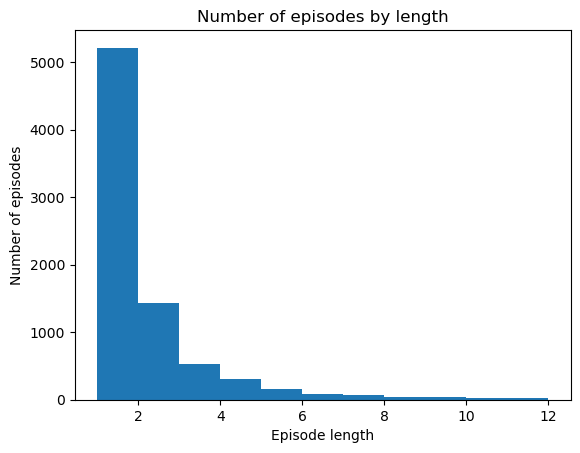

In [ ]:
plt.title('Number of episodes by length')
plt.xlabel('Episode length')
plt.ylabel('Number of episodes')
plt.hist(episodeLen, [1,2,3,4,5,6,7,8,9,10,11,12])

In [ ]:
table_eps_len_2 = final_filter[final_filter.episodeId.isin(twoOrMore)]

In [ ]:
len(table_eps_len_2) # Filtered all episodes containing only 1 incident

10249

In [ ]:
cNextT = columnAction
cCurrT = columnEffect

setActions = pd.Series(final_filter[columnAction]).drop_duplicates().tolist()
print(setActions)

columnname = columnResponse
cMeasureValues = pd.Series(final_filter[columnResponse]).drop_duplicates().tolist()
print(cMeasureValues)


setResponse = set()
for i in cMeasureValues:
    for v in str(i).split(';'):
        setResponse.add(v.strip())

setResponse.remove('nan')
print(setResponse)


['va', 'sib', 'pp', 'po']
['contact beeindigd/weggegaan', 'nan ; geen', 'client toegesproken/gesprek met client ; contact beeindigd/weggegaan', 'client toegesproken/gesprek met client', 'geen', 'naar andere kamer/ruimte gestuurd', 'client toegesproken/gesprek met client ; client afgeleid ; contact beeindigd/weggegaan', 'client afgeleid ; client afgeleid ; nan', 'geen ; preventieve maatregelen gestart', 'met kracht tegen- of vastgehouden', 'client afgeleid ; contact beeindigd/weggegaan', 'client toegesproken/gesprek met client ; client afgeleid ; met kracht tegen- of vastgehouden', 'client toegesproken/gesprek met client ; naar andere kamer/ruimte gestuurd', 'met kracht tegen- of vastgehouden ; naar andere kamer/ruimte gestuurd', 'naar andere kamer/ruimte gestuurd ; client toegesproken/gesprek met client', 'naar andere kamer/ruimte gestuurd ; client toegesproken/gesprek met client ; client afgeleid ; contact beeindigd/weggegaan ; met kracht tegen- of vastgehouden', 'met kracht tegen- of

In [ ]:
cNextT = columnAction
cCurrT = columnEffect

setActions = pd.Series(prev_meas[columnAction]).drop_duplicates().tolist()
print(setActions)

columnname = columnResponse
cMeasureValues = pd.Series(prev_meas[columnResponse]).drop_duplicates().tolist()
print(cMeasureValues)


setResponse = set()
for i in cMeasureValues:
    for v in str(i).split(';'):
        setResponse.add(v.strip())

setResponse.remove('nan')
print(setResponse)

['va', 'sib', 'pp', 'po']
['contact beeindigd/weggegaan', 'nan ; geen', 'client toegesproken/gesprek met client ; contact beeindigd/weggegaan', 'client toegesproken/gesprek met client', 'geen', 'naar andere kamer/ruimte gestuurd', 'client toegesproken/gesprek met client ; client afgeleid ; contact beeindigd/weggegaan', 'client afgeleid ; client afgeleid ; nan', 'met kracht tegen- of vastgehouden', 'client afgeleid ; contact beeindigd/weggegaan', 'client toegesproken/gesprek met client ; client afgeleid ; met kracht tegen- of vastgehouden', 'client toegesproken/gesprek met client ; naar andere kamer/ruimte gestuurd', 'met kracht tegen- of vastgehouden ; naar andere kamer/ruimte gestuurd', 'naar andere kamer/ruimte gestuurd ; client toegesproken/gesprek met client', 'naar andere kamer/ruimte gestuurd ; client toegesproken/gesprek met client ; client afgeleid ; contact beeindigd/weggegaan ; met kracht tegen- of vastgehouden', 'met kracht tegen- of vastgehouden ; met kracht tegen- of vastg

In [ ]:

#data['Next_Type_Eps'].replace(np.nan, "NaN", inplace = True)


# FF = calcFreqMeasuresCombined2DDict(data, columnname+cMeasureValues[0])
FF = calcFreqMeasures2DDict(prev_meas, columnAction, columnResponse, columnEffect, setResponse)
# F = calcFreq2DDict(data, cMeasureT)


# for ai in F:
#     F[ai][ai] = 0


In [ ]:
# -----------------
# Example : two dimentional dictionary to data frame
# ------------------
# Set label to get a slice of the 3d array
#label = 'sib'
table = pd.DataFrame(FF)
#print(table[label])

#print(table[label]['client toegesproken/gesprek met client'])
column_indices = []
column_sums = []
for label in table:
    #print(table[label])
    #del table[label]['preventieve maatregelen gestart']
    sums = []
    for each in table[label]:
        sums.append(sum(each.values()))
    column_sums.append(sums)

# As can be seen, all actions are unevenly distributed depending on the state
# Therefore we must use all actions and cannot shrink, because different actions can be done in each stage
for each in column_sums:
    np_lst = np.array(each)
    sorted_indices = np_lst.argsort()
    print(sorted_indices[::-1])
    

[0 2 1 5 4 6 3 7]
[0 3 2 4 6 1 5 7]
[0 2 6 1 5 4 7 3]
[0 2 4 1 5 7 3 6]


In [ ]:
state = -1
for label in table:
    state += 1
    action = -1
    for each in table[label]:
        action += 1
        for key in each:
            each[key] /= column_sums[state][action]

In [ ]:
# Delete the total column since it is unnecessary for the environment
for label in table:
    del table[label]['columnTot']

In [ ]:
for label in table:
    print(table[label])

contact beeindigd/weggegaan               {'sib': 0.016039481801357187, 'pp': 0.14497223...
client toegesproken/gesprek met client    {'pp': 0.13498952409458245, 'Tau': 0.574977551...
geen                                      {'Tau': 0.5918367346938775, 'va': 0.1836734693...
client afgeleid                           {'pp': 0.17118402282453637, 'Tau': 0.514978601...
naar andere kamer/ruimte gestuurd         {'Tau': 0.5496974935177182, 'va': 0.2584269662...
met kracht tegen- of vastgehouden         {'pp': 0.21645021645021645, 'va': 0.1688311688...
afzondering (deur op slot)                {'pp': 0.4444444444444444, 'sib': 0.0085470085...
Name: va, dtype: object
contact beeindigd/weggegaan               {'pp': 0.1927710843373494, 'sib': 0.1566265060...
client toegesproken/gesprek met client    {'Tau': 0.5019206145966709, 'pp': 0.1574903969...
geen                                      {'va': 0.045512010113780026, 'Tau': 0.56005056...
client afgeleid                           {'Tau': 0.5410

In [ ]:
table = table.drop(['columnTot'])

In [ ]:
# Transfer to csv
table.to_csv("data/frequencies_final_1.csv")

In [ ]:
table['va'].to_csv("data/frequencies_1.csv")

In [ ]:
# Calc 3d measures, i.e. counts of ARE tuples (Action Response Effect)
def calcFreqMeasures2DDict(data, cCurrT, columnResponse, cNextT, setResponses):
    F = dict()
    for index, row in data.iterrows():
        currT = row[cCurrT]
        nextT = row[cNextT]
        Total = 0
        for cMeasureValue in setResponses:
            values = str(row[columnResponse]).split(';')
            values = [x.strip() for x in values ]
            if(cMeasureValue in values):
                if currT not in F:
                    F[currT] = dict()
                    F[currT]["columnTot"] = dict()
                if cMeasureValue not in F[currT]:
                    F[currT][cMeasureValue] = dict()
                if nextT not in F[currT][cMeasureValue]:
                    if nextT != np.nan:
                        F[currT][cMeasureValue][nextT] = 0
                F[currT][cMeasureValue][nextT] += 1
                Total += 1
        if nextT not in F[currT]["columnTot"]:
            F[currT]["columnTot"][nextT] = 0
        F[currT]["columnTot"][nextT] += Total
        
    return F

In [ ]:
thisdict = {
    "client toegesproken/gesprek met client":"Talk to client",
    "geen" : "No measure",
    "nan" : "nan",
    "met kracht tegen- of vastgehouden" : "Hold with force",
    "naar andere kamer/ruimte gestuurd" : "Send to other room",
    "client afgeleid":"Distract client",
    "contact beeindigd/weggegaan" : "Terminate contact",
    "afzondering (deur op slot)" : "Seclusion",
    "preventieve maatregelen gestart" : "Prevention" 
}



Text(0.5, 1.0, '$\\tau$')

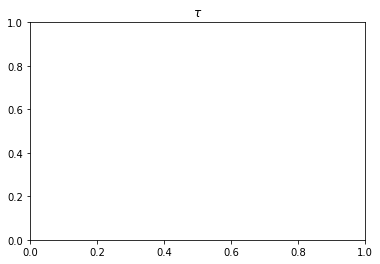

In [ ]:
plt.title(r'$\tau$')